# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# from pprint import pprint
# url = "https://api.openweathermap.org/data/2.5/weather?q=" 
# city_url = (f'London&appid={weather_api_key}')
# city_weather = requests.get(url + city_url).json()
# pprint(city_weather)

In [39]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{city}&appid={weather_api_key}')

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | imbituba
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | campbell river
Processing Record 7 of Set 1 | delano
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | copala
Processing Record 10 of Set 1 | la'ie
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | pacasmayo
Processing Record 15 of Set 1 | harper
Processing Record 16 of Set 1 | howard springs
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | chibougamau
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | kasumkent
Processing Record 22 of Set 1 | tanhacu
Pr

In [130]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          609
Lat           609
Lng           609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [135]:
# Display sample data
#changed date format
# city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit= 's').dt.strftime('%Y-%m-%d')

# city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15 #converts the temp from Kelvin to Celsius
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,19.01,64,80,4.53,PN,2024-08-28
1,port-aux-francais,-49.3500,70.2167,5.53,97,100,13.67,TF,2024-08-28
2,imbituba,-28.2400,-48.6703,10.14,86,25,1.57,BR,2024-08-28
3,waitangi,-43.9535,-176.5597,11.01,96,100,4.92,NZ,2024-08-28
4,campbell river,50.0163,-125.2446,13.58,85,0,3.48,CA,2024-08-28


In [136]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [145]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.01,64,80,4.53,PN,2024-08-28
1,port-aux-francais,-49.3500,70.2167,5.53,97,100,13.67,TF,2024-08-28
2,imbituba,-28.2400,-48.6703,10.14,86,25,1.57,BR,2024-08-28
3,waitangi,-43.9535,-176.5597,11.01,96,100,4.92,NZ,2024-08-28
4,campbell river,50.0163,-125.2446,13.58,85,0,3.48,CA,2024-08-28


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

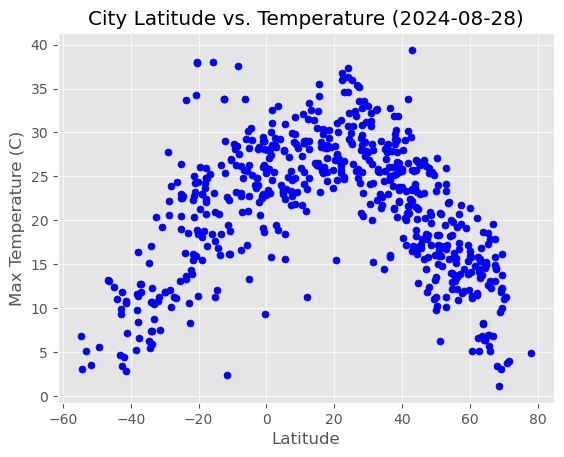

In [164]:
# Build scatter plot for latitude vs. temperature
plt.style.use('ggplot')
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], s=25, color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature ({city_data_df.loc[0, 'Date']})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(alpha=0.7)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

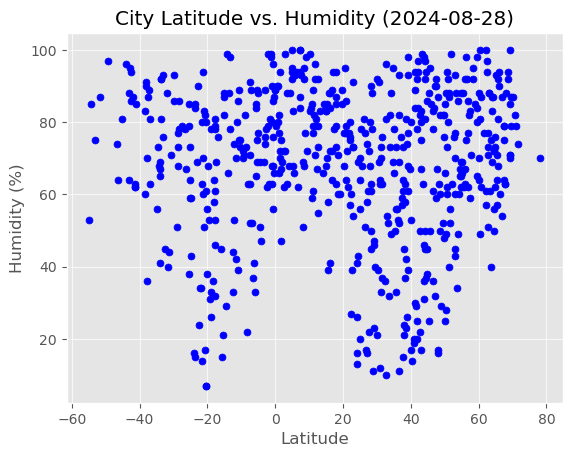

In [242]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], s=25, color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({city_data_df.loc[0, 'Date']})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(alpha=0.7)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

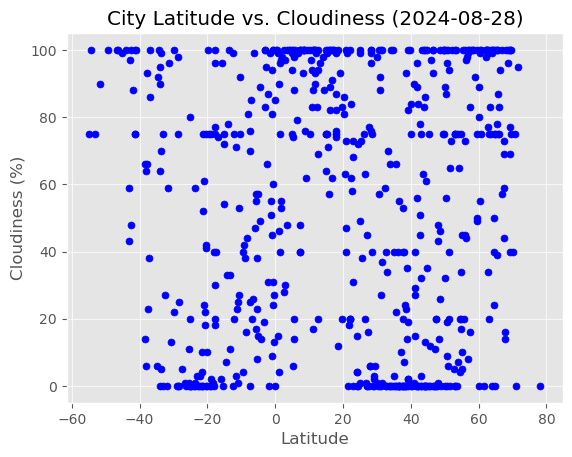

In [156]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], s=25, color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_data_df.loc[0, 'Date']})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(alpha=0.7)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

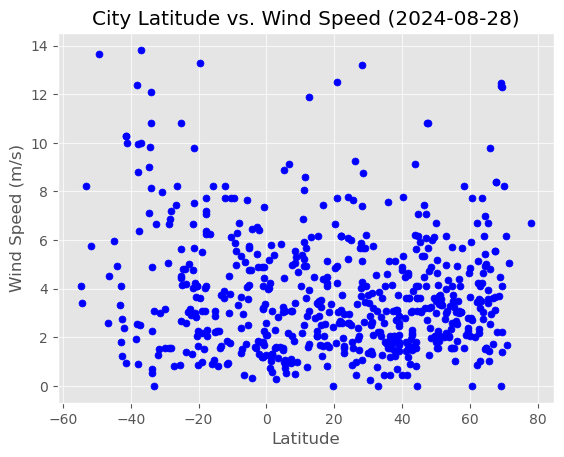

In [165]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], s=25, color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({city_data_df.loc[0, 'Date']})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(alpha=0.7)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [294]:

# Define a function to create Linear Regression plots
def lin_regress(x_values, y_values, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)

    # Calculate the regression line equation
    regress_line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create the scatter plot
    plt.scatter(x_values, y_values, s=25, color='b')

    # Plot the regression line
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")


   #labeling
    plt.title(f"Latitude vs. {y_values.name}")
    plt.xlabel('Latitude')
    plt.ylabel(y_values.name)
    plt.grid(alpha=0.7)
    plt.show()

    print(f"The r²-value is: {r_value**2:}")

    return
    


In [267]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]

# Display sample data

northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,campbell river,50.0163,-125.2446,13.58,85,0,3.48,CA,2024-08-28
5,delano,35.7688,-119.2470,23.00,56,0,1.54,US,2024-08-28
7,copala,16.6500,-98.9833,25.41,89,100,1.64,MX,2024-08-28
8,la'ie,21.6477,-157.9253,26.66,77,18,2.68,US,2024-08-28
9,sitka,57.0531,-135.3300,13.94,82,100,4.12,US,2024-08-28
...,...,...,...,...,...,...,...,...,...
598,paoua,7.2427,16.4406,21.75,94,100,1.10,CF,2024-08-28
602,chernolesskoye,44.7156,43.7133,26.61,45,35,7.07,RU,2024-08-28
605,kemin,42.7846,75.6892,29.45,22,51,3.05,KG,2024-08-28


In [268]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.01,64,80,4.53,PN,2024-08-28
1,port-aux-francais,-49.3500,70.2167,5.53,97,100,13.67,TF,2024-08-28
2,imbituba,-28.2400,-48.6703,10.14,86,25,1.57,BR,2024-08-28
3,waitangi,-43.9535,-176.5597,11.01,96,100,4.92,NZ,2024-08-28
6,touros,-5.1989,-35.4608,22.72,88,57,5.74,BR,2024-08-28


###  Temperature vs. Latitude Linear Regression Plot

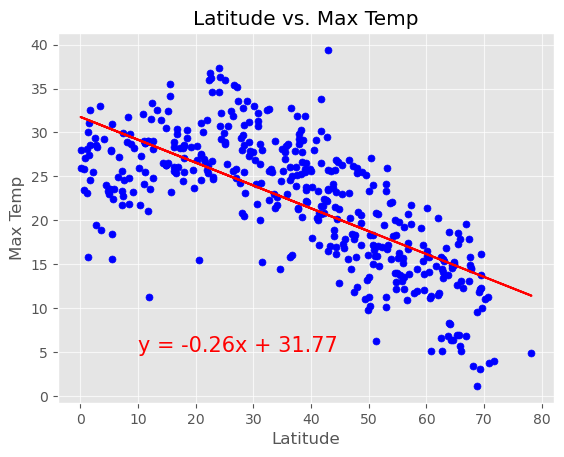

The r²-value is: 0.4953440427054925


In [271]:
lin_regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10,5))

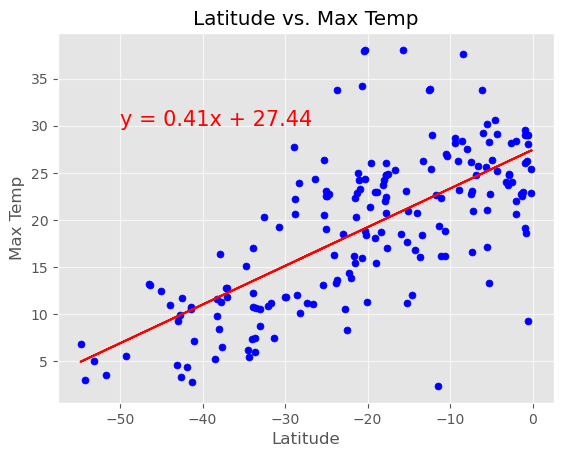

The r²-value is: 0.4798285548898831


In [270]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-50,30))

With both r^2 values being about 0.48 - 0.50, the correlation is just below the moderate value of 0.5. But there is definaetly a correlation that the max temps get higher as the lattitude is closer to 0. 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

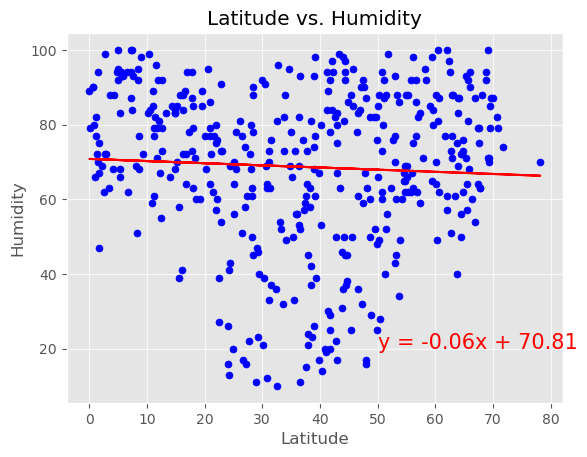

The r²-value is: 0.0028152828230693853


In [277]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (50,20))

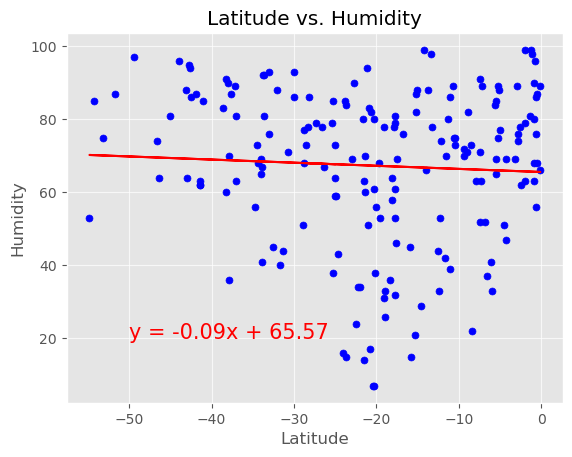

The r²-value is: 0.002996076392332791


In [278]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-50,20))

**Discussion about the linear relationship:** There is no correlation between Humidity and Latitude. Both plots, the points look almost like a square and are all over the place. The r^2 value of 0.002 with both hemispheres proves this as well. 

### Cloudiness vs. Latitude Linear Regression Plot

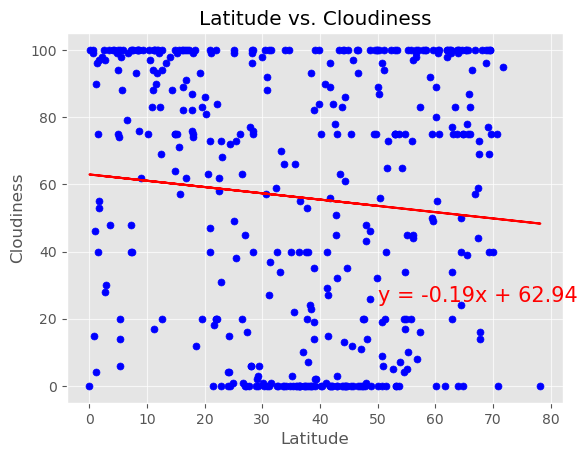

The r²-value is: 0.009088360951994733


In [286]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (50,25))

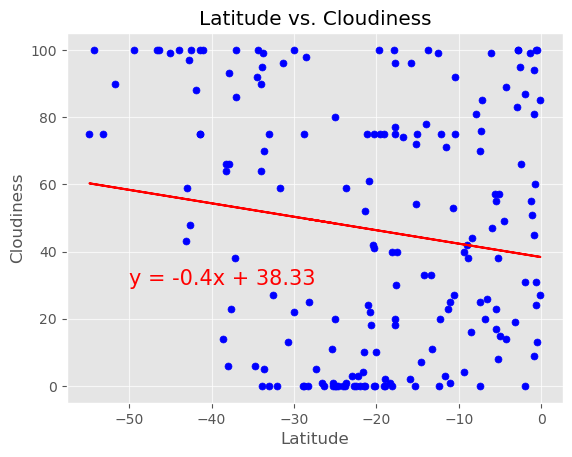

The r²-value is: 0.02232605422489179


In [283]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-50,30))

**Discussion about the linear relationship:** Again with the plots r^2 value of 0.01 and 0.02, there is no correlation between Cloudiness and Latitude

### Wind Speed vs. Latitude Linear Regression Plot

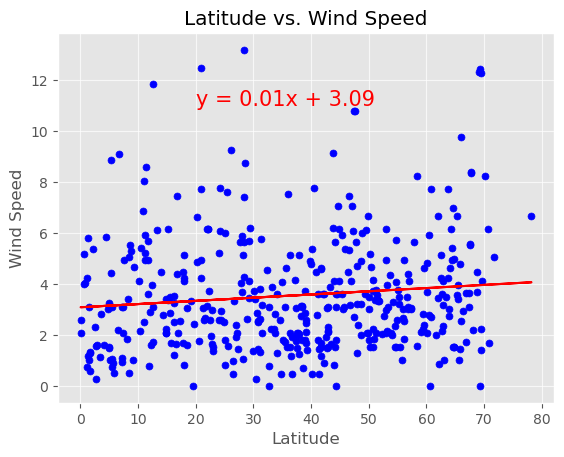

The r²-value is: 0.01212813526622303


In [287]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (20,11))

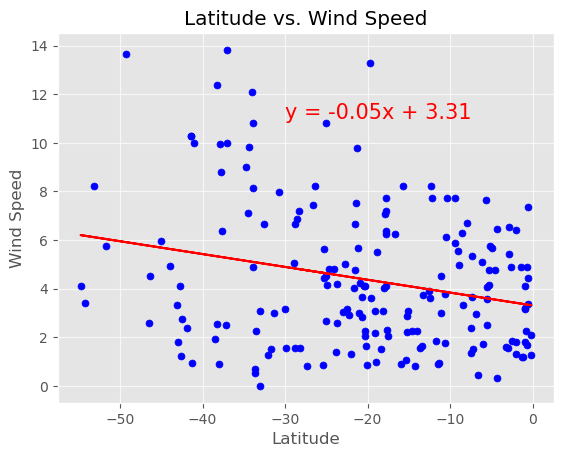

The r²-value is: 0.0612508662586893


In [292]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-30,11))

**Discussion about the linear relationship:** Again with the plots r^2 value of 0.06 and 0.01, there is no correlation between Latitude and Wind Speed. The plots are in the shape of a rectangle almost. 